In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import cv2
import random

In [3]:
PATHDIR = "../input/cat-and-dog/"
categories = ["cats","dogs"]

IMG_SIZE = 100


def create_training_data():
    training_data = []
    
    for c in categories:
        for img_name in os.listdir(os.path.join(PATHDIR,"training_set/training_set",c)):
            img_path = os.path.join(PATHDIR,"training_set/training_set",c,img_name)
            img_arr = cv2.imread(img_path,0)
            try:
                resized = cv2.resize(img_arr, (IMG_SIZE,IMG_SIZE))
                norm_arr = resized/255
                training_data.append([norm_arr, categories.index(c)])
            except Exception as e:
                pass
    random.shuffle(training_data)
    return training_data

training_data = create_training_data()

In [4]:
X = []
y = []

for f,l in training_data:
    X.append(f)
    y.append(l)
    
X = np.array(X).reshape(-1, IMG_SIZE,IMG_SIZE,1)
y = np.array(y)

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [6]:
model = Sequential()

#First Layer
model.add(Conv2D(64, (3,3), input_shape = (IMG_SIZE,IMG_SIZE,1)))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Flatten())

#Second Layer
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))

#Output Layer
model.add(Dense(10, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 153664)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               19669120  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 19,671,050
Trainable params: 19,671,050
Non-trainable params: 0
____________________________________________

In [7]:
model.compile(optimizer = "adam",
             loss ="sparse_categorical_crossentropy",
             metrics = ["accuracy"])

model.fit(X,y, epochs = 20)

Epoch 1/20
251/251 [==============================] - 2s 8ms/step - loss: 0.9996 - accuracy: 0.5921
Epoch 2/20
251/251 [==============================] - 2s 8ms/step - loss: 0.5846 - accuracy: 0.6858
Epoch 3/20
251/251 [==============================] - 2s 7ms/step - loss: 0.4876 - accuracy: 0.7557
Epoch 4/20
251/251 [==============================] - 2s 7ms/step - loss: 0.3959 - accuracy: 0.8165
Epoch 5/20
251/251 [==============================] - 2s 8ms/step - loss: 0.2976 - accuracy: 0.8775
Epoch 6/20
251/251 [==============================] - 2s 8ms/step - loss: 0.2050 - accuracy: 0.9220
Epoch 7/20
251/251 [==============================] - 2s 7ms/step - loss: 0.1360 - accuracy: 0.9554
Epoch 8/20
251/251 [==============================] - 2s 8ms/step - loss: 0.0826 - accuracy: 0.9769
Epoch 9/20
251/251 [==============================] - 2s 8ms/step - loss: 0.0912 - accuracy: 0.9705
Epoch 10/20
251/251 [==============================] - 2s 8ms/step - loss: 0.0596 - accuracy: 0.9825

In [8]:
def create_testing_data():
    testing_data = []
    
    for c in categories:
        for img_name in os.listdir(os.path.join(PATHDIR,"training_set/training_set",c)):
            img_path = os.path.join(PATHDIR,"training_set/training_set",c,img_name)
            img_arr = cv2.imread(img_path,0)
            try:
                resized = cv2.resize(img_arr, (IMG_SIZE,IMG_SIZE))
                norm_arr = resized/255
                testing_data.append([norm_arr, categories.index(c)])
            except Exception as e:
                pass
    random.shuffle(testing_data)
    return testing_data

test_data = create_testing_data()

In [9]:
X_test = []
y_test = []

for f,l in test_data:
    X_test.append(f)
    y_test.append(l)
    
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE,1)
y_test = np.array(y_test)

In [10]:
model.evaluate(X_test, y_test)

251/251 [==============================] - 1s 4ms/step - loss: 0.0048 - accuracy: 0.9995


[0.004839101806282997, 0.9995003342628479]

In [11]:
import matplotlib.pyplot as plt

In [12]:
img_path = "../input/cat-dataset/CAT_00/00000001_005.jpg"
img_arr = cv2.imread(img_path,0)
img_arr = cv2.resize(img_arr, (IMG_SIZE,IMG_SIZE))
norm_arr = img_arr/255
pred_img = (norm_arr)
    
    
pred_img = pred_img.reshape(100,100,1)

This is a CAT!


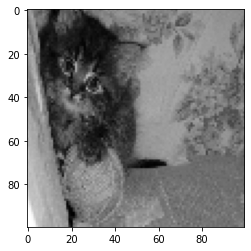

In [13]:
test_img = pred_img
test_img = test_img.reshape(1,IMG_SIZE,IMG_SIZE,1)
predict_ = model.predict(test_img)[0]

for i in range(len(predict_)):
    if(predict_[i] == max(predict_)):
        if(i == 0):
            print("This is a CAT!")
        else:
            print("This is a DOG!")
        
plt.imshow(test_img.reshape(IMG_SIZE,IMG_SIZE), cmap='gray')